In [3]:
from google.colab import files
uploaded = files.upload()
import io

Saving MSFT.csv to MSFT.csv


# Preprocessing

In [0]:
import numpy as np 
import pandas as pd 

data = pd.read_csv(io.BytesIO(uploaded['MSFT.csv']))# Dataset is now stored in a Pandas Dataframe


Create a dataframe with a variable size sliding window

In [5]:
#window = data.rolling(7)
dif = data['Close'] - data['Open']
dif_data = pd.DataFrame([data['Date'], dif]).T
#display(dif_data)

n = 7 #Window Size
window = []

for r in range(n,len(dif_data.index)):
  frame = [dif_data.iloc[r]['Date'], dif_data.iloc[r]['Unnamed 0']]
  for w in range(1,n+1):
    frame.append(dif_data.iloc[r-w]['Unnamed 0'])
  window.append(frame)
windowed_data = pd.DataFrame(window)

display(windowed_data)

,0,1,2,3,4,5,6,7,8
0,1986-03-24,-0.002604,-0.002604,-0.002604,-0.001736,-0.002605,0.001737,0.003472,0.008680
1,1986-03-25,0.001736,-0.002604,-0.002604,-0.002604,-0.001736,-0.002605,0.001737,0.003472
2,1986-03-26,0.002604,0.001736,-0.002604,-0.002604,-0.002604,-0.001736,-0.002605,0.001737
3,1986-03-27,0.001736,0.002604,0.001736,-0.002604,-0.002604,-0.002604,-0.001736,-0.002605
4,1986-03-31,-0.000868,0.001736,0.002604,0.001736,-0.002604,-0.002604,-0.002604,-0.001736
...,...,...,...,...,...,...,...,...,...
8404,2019-07-26,0.970001,-0.239991,1.820007,-0.470002,1.019989,-3.600006,0.869995,-1.429993
8405,2019-07-29,-0.470001,0.970001,-0.239991,1.820007,-0.470002,1.019989,-3.600006,0.869995
8406,2019-07-30,0.210007,-0.470001,0.970001,-0.239991,1.820007,-0.470002,1.019989,-3.600006
8407,2019-07-31,-4.059998,0.210007,-0.470001,0.970001,-0.239991,1.820007,-0.470002,1.019989


In [6]:
binary_window = windowed_data[0]
win = windowed_data.drop(columns=0)
binary_window = pd.concat([binary_window,win.mask(win > 0, True).mask(win < 0, False)], axis=1)
display(binary_window)

,0,1,2,3,4,5,6,7,8
0,1986-03-24,False,False,False,False,False,True,True,True
1,1986-03-25,True,False,False,False,False,False,True,True
2,1986-03-26,True,True,False,False,False,False,False,True
3,1986-03-27,True,True,True,False,False,False,False,False
4,1986-03-31,False,True,True,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...
8404,2019-07-26,True,False,True,False,True,False,True,False
8405,2019-07-29,False,True,False,True,False,True,False,True
8406,2019-07-30,True,False,True,False,True,False,True,False
8407,2019-07-31,False,True,False,True,False,True,False,True


2      3      4      5      6      7      8    
False  False  False  False  False  False  False    32
                                          True     39
                                   True   False    38
                                          True     32
                            True   False  False    39
                                                   ..
True   True   True   True   False  True   True     29
                            True   False  False    33
                                          True     29
                                   True   False    25
                                          True     27
Length: 128, dtype: int64

46
19


2      3      4      5      6      7      8    
False  False  False  False  False  False  False    47
                                          True     32
                                   True   False    34
                                          True     37
                            True   False  False    32
                                                   ..
True   True   True   True   False  True   True     34
                            True   False  False    28
                                          True     26
                                   True   False    37
                                          True     25
Length: 128, dtype: int64

49
21


0     1
2     3     4     5     6     7     8              
False False False False False False False  32  True
                                    True   39  True
                              True  False  38  True
                                    True   32  True
                        True  False False  39  True
...                                        ..   ...
True  True  True  True  False True  True   29  True
                        True  False False  33  True
                                    True   29  True
                              True  False  25  True
                                    True   27  True

[128 rows x 2 columns]

0      1
2     3     4     5     6     7     8               
False False False False False False False  47  False
                                    True   32  False
                              True  False  34  False
                                    True   37  False
                        True  False False  32  False
...                                        ..    ...
True  True  True  True  False True  True   34  False
                        True  False False  28  False
                                    True   26  False
                              True  False  37  False
                                    True   25  False

[128 rows x 2 columns]

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


ValueError: ignored

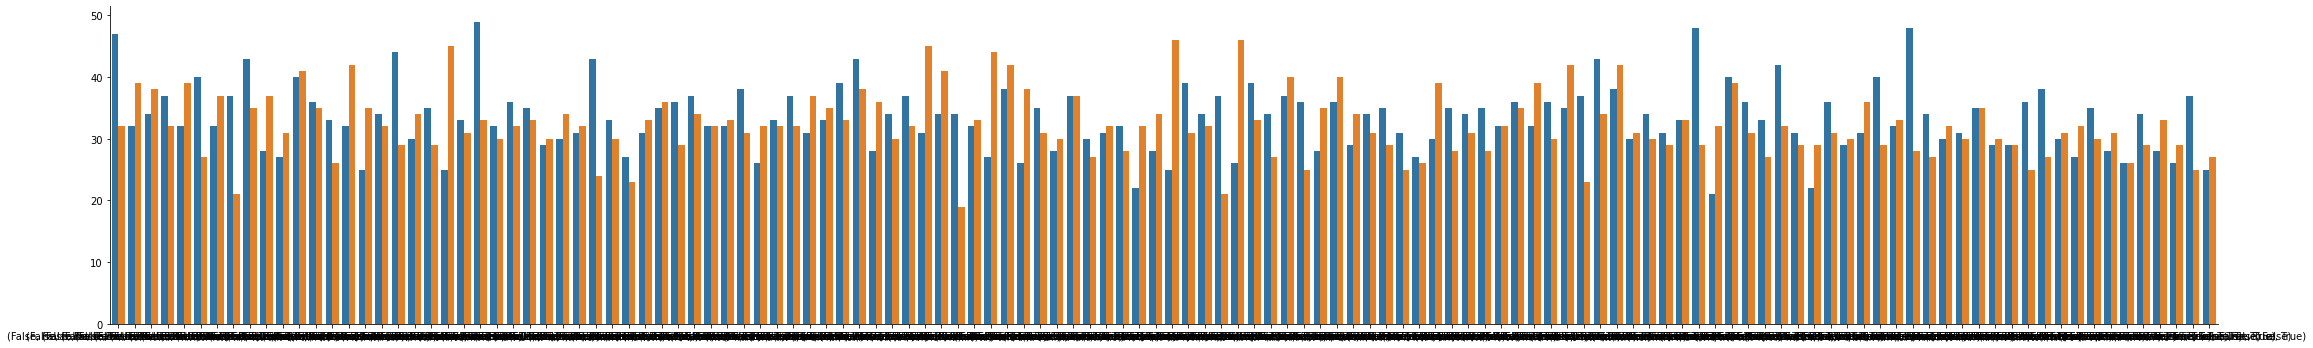

In [7]:
bin_win = binary_window.drop(columns=[0])
bin_win_true = bin_win[bin_win[1] == True].drop(columns=1)
bin_win_true = bin_win_true.groupby(bin_win_true.columns.tolist(),as_index=False).size()
bin_win_false = bin_win[bin_win[1] == False].drop(columns=1)
bin_win_false = bin_win_false.groupby(bin_win_false.columns.tolist(),as_index=False).size()

display(bin_win_true)
print(bin_win_true.max())
print(bin_win_true.min())
display(bin_win_false)
print(bin_win_false.max())
print(bin_win_false.min())

bin_win_true = pd.concat([bin_win_true,bin_win_true >= 0],axis=1)
bin_win_false = pd.concat([bin_win_false, bin_win_false < 0],axis=1)

display(bin_win_true)
display(bin_win_false)

chart = pd.concat([bin_win_true,bin_win_false],axis=0)

#import matplotlib.pyplot as plt
import seaborn
fg = seaborn.catplot(x=chart.index, y=0, hue=1, 
                        data=chart, kind='bar', height=5, aspect=6)


#chart = pd.concat([pd.concat([bin_win_true,bin_win_true >= 0],axis=1),pd.concat([bin_win_false, bin_win_false < 0],axis=1)],axis=0)
#display(chart)
#chart.unstack(level=0)
#display(chart)

#import altair as alt
#bar = alt.Chart(data=chart,height=200, width=100).mark_bar().encode(
#    x=alt.X('primary_type:N',
#            axis=None,
#            title=None,
#            sort=alt.EncodingSortField(op='sum', field='1')),
#    y=alt.Y('sum(0):Q',
#          title='Total Number of Incidents'),
#    color=alt.Color('primary_type:N')
#).facet(
#    column=alt.Column('index:O')
#).resolve_scale(
#    x='independent'
#)

#display(bar)
#bin_win.plot(kind='bar', figsize= (20,10))

# Processing

Naive Bayes implementations to try: Gaussian and Bernouli (binary)

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, BernoulliNB

y = windowed_data[1] > 0
X = windowed_data.drop(columns=[0,1])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

Xb_train = X_train > 0
Xb_test = X_test > 0

gnb = GaussianNB()
bnb = BernoulliNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print("Gaussian: Number of mislabeled points out of a total %d points : %d"
       % (X_test.shape[0], (y_test != y_pred).sum()))
yb_pred = bnb.fit(Xb_train, y_train).predict(Xb_test)
print("Bernoulli: Number of mislabeled points out of a total %d points : %d"
       % (Xb_test.shape[0], (y_test != y_pred).sum()))

Gaussian: Number of mislabeled points out of a total 4205 points : 2069
Bernoulli: Number of mislabeled points out of a total 4205 points : 2069
